In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
def pie1(x1,x2,w):
    return 1/(1+np.exp((-1)*(w[2][0]*x2+w[1][0]*x1+w[0][0])))

In [86]:
def pie2(x1,x2,w):
    return 1/(1+np.exp(w[2][0]*x2+w[1][0]*x1+w[0][0]))

In [82]:
def Loss(yi,x1,x2,w):
    if(yi==1):
        return -1*np.log(pie1(x1,x2,w))
    else:
        return -1*np.log(pie2(x1,x2,w))

In [79]:
def cost(X,Y,W):
    cost=0.00
    for i in range(20):
        xi=X[i,:]
        yi=Y[i][0]
        w=W
        cost+=Loss(yi,xi[1],xi[2],w)
    return cost

In [68]:
X=np.ndarray((20,3))
Y=np.ndarray((20,1))

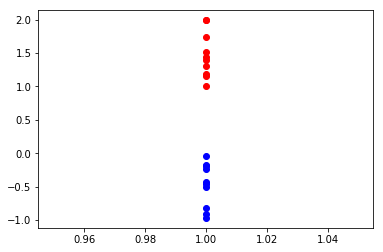

In [69]:
data=open("/home2/ailab/Downloads/lab7/logistic",'rb')
k=0
i=0
for line in data:
    word=line.split()
    if(k!=0):
        X[i][0]=1.00
        X[i][1]=word[0]
        X[i][2]=word[1]
        Y[i][0]=word[2]
        if(Y[i][0]==-1):
            plt.plot(X[i][0],X[i][1],'bo')
        else:
            plt.plot(X[i][0],X[i][1],'ro')
        i+=1
    k+=1
plt.show()

In [70]:
def dL1(x,w):
    a=(-1)*pie1(x[1],x[2],w)*np.exp((-1)*(x[1]*w[1]+x[2]*w[2]+w[0]))*(x[1])
    b=(-1)*pie1(x[1],x[2],w)*np.exp((-1)*(x[1]*w[1]+x[2]*w[2]+w[0]))*(x[2])
    c=(-1)*pie1(x[1],x[2],w)*np.exp((-1)*(x[1]*w[1]+x[2]*w[2]+w[0]))
    return a,b,c

In [71]:
def dL2(x,w):
    a=pie2(x[1],x[2],w)*np.exp((x[1]*w[1]+x[2]*w[2]+w[0]))*(x[1])
    b=pie2(x[1],x[2],w)*np.exp((x[1]*w[1]+x[2]*w[2]+w[0]))*(x[2])
    c=pie2(x[1],x[2],w)*np.exp((x[1]*w[1]+x[2]*w[2]+w[0]))
    return a,b,c

In [72]:
W=np.random.random((3,1))

In [73]:
def phie(X,W):
    return np.dot(X,W)

In [87]:
def GD(X,Y,W,it=1000,alpha=0.001):
    C=cost(X,Y,W)
    plt.plot(C,0,'ro')
    for i in range(1000):
        for j in range(20):
            if(Y[j][0]==1):
                a,b,c=dL1(X[j,:],W)
            else:
                a,b,c=dL2(X[j,:],W)
            W[0][0]=W[0][0]-alpha*(c)
            W[1][0]=W[2][0]-alpha*(a)
            W[2][0]=W[1][0]-alpha*(b)
        if(i%50==0):
            C=cost(X,Y,W)
            plt.plot(C,i,'ro')
    plt.show()
    return W

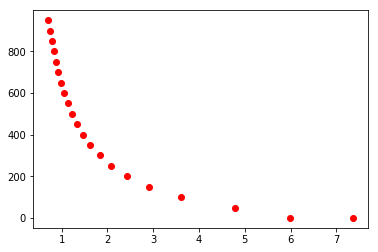

In [88]:
W=GD(X,Y,W,1000,0.001)

In [89]:
print(W)

[[-0.98947448]
 [ 2.14592936]
 [ 2.14594462]]


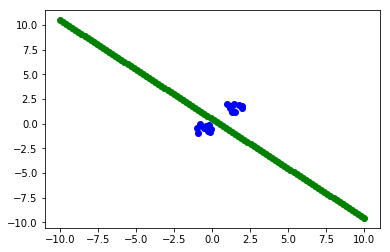

In [91]:
x=np.linspace(-10,10,100)
plt.plot(X[:,1],X[:,2],'bo')
plt.plot(x,(-1)*(W[1][0]*x+W[0][0])/W[2][0],'go')